In [48]:
import yfinance as yf

# Download the data
data = yf.download('SPY', period='max', interval='1d')

# Calculate returns and squared returns
data['returns'] = data['Adj Close'].pct_change() * 100
data['squared_returns'] = data['returns'] ** 2

# Clean data
data.dropna(inplace=True, axis=0)

print(data)

[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1993-02-01   43.968750   44.250000   43.968750   44.250000   24.859686   
1993-02-02   44.218750   44.375000   44.125000   44.343750   24.912331   
1993-02-03   44.406250   44.843750   44.375000   44.812500   25.175669   
1993-02-04   44.968750   45.093750   44.468750   45.000000   25.281013   
1993-02-05   44.968750   45.062500   44.718750   44.968750   25.263474   
...                ...         ...         ...         ...         ...   
2024-09-11  548.700012  555.359985  539.960022  554.419983  554.419983   
2024-09-12  555.010010  559.400024  552.739990  559.090027  559.090027   
2024-09-13  559.710022  563.030029  559.450012  562.010010  562.010010   
2024-09-16  561.739990  563.109985  559.900024  562.840027  562.840027   
2024-09-17  565.099976  566.580017  560.789978  563.070007  563.070007   

              Volume   returns  squar

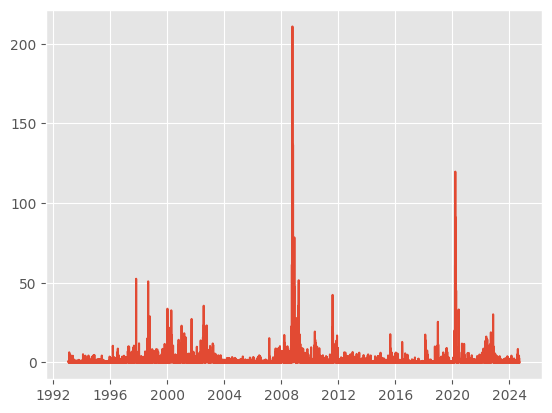

In [49]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Plot the squared returns
plt.plot(data['squared_returns'])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


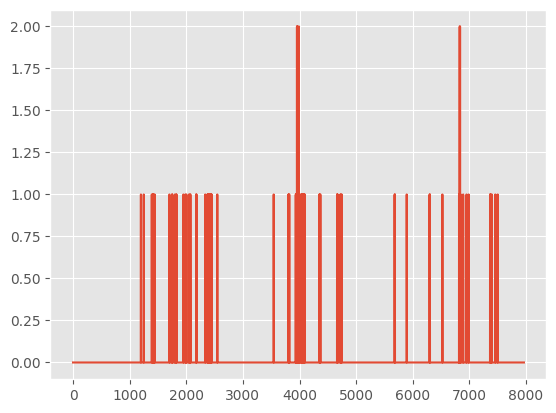

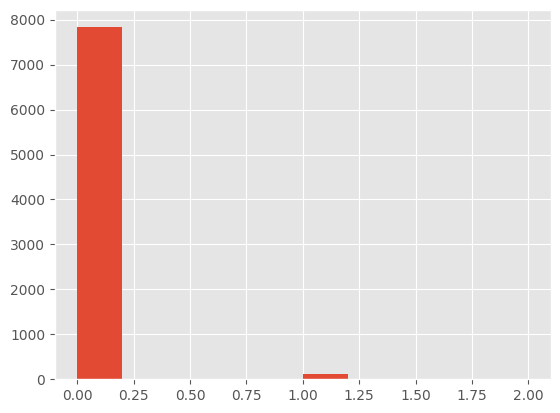

In [50]:
# Time Series Clustering with K-Means
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.array(data['squared_returns']).reshape(-1, 1))

# Cluster using K-Means
"""
* Classify the data into 3 clusters based in the squared volatility levels
*
* Hypothesis:
* Level 0: Low volatility
* Level 1: Medium volatility
* Level 2: High volatility
"""
k_means = KMeans(n_clusters=3, random_state=0)
tscluster_labels = k_means.fit_predict(scaled_data)

# Plot the labels and their distribution
plt.plot(tscluster_labels)
plt.show()

plt.hist(tscluster_labels)
plt.show()

7964
[0 0 0 ... 0 0 0]


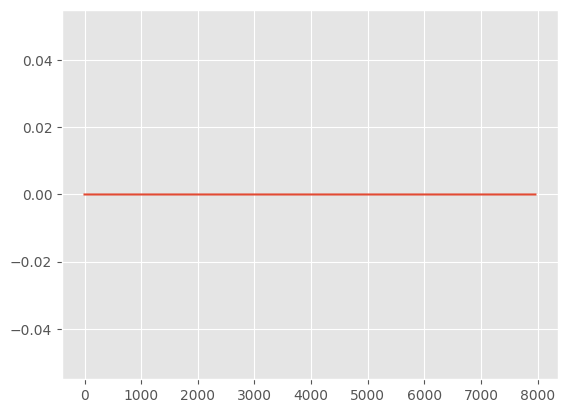

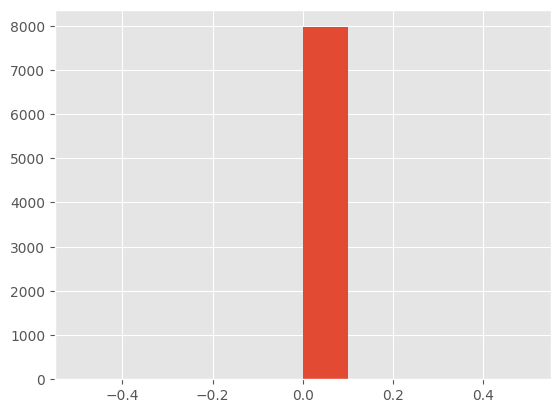

In [54]:
!pip install tslearn

# Shape-Based Clustering with Dynamic Time Warping
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

# Create time-series data
time_series_data = np.array(data['squared_returns']).reshape(-1,1)

# Standardize the data
scaler = TimeSeriesScalerMeanVariance()
scaled_data = scaler.fit_transform(time_series_data)

# Cluster using K-Means
k_means = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
dtw_labels = k_means.fit_predict(scaled_data)

print(len(dtw_labels))
print(dtw_labels)

# Plot the labels and their distribution
plt.plot(dtw_labels)
plt.show()

plt.hist(dtw_labels)
plt.show()

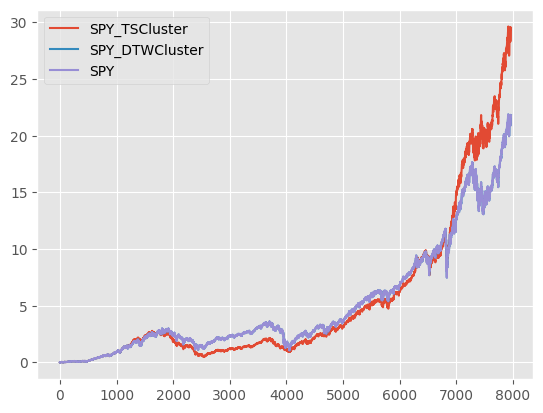

In [52]:
# Market Timing using Time Series Clustering with K-Means
data['ts_cluster_labels'] = tscluster_labels
data['dtw_labels'] = dtw_labels

# Returns for Time-Series Clustering
tscluster_returns = []
tscluster_returns.append(0)

# Returns for Sequence Clustering
dtw_returns = []
dtw_returns.append(0)

for i in range(len(data)):
  # Time-Series Clustering
  if data['ts_cluster_labels'].iloc[i] == 0:
    tscluster_returns.append(data['returns'].iloc[i])
  else:
    tscluster_returns.append(0)

  # Sequence Clustering
  if data['dtw_labels'].iloc[i] == 0:
    dtw_returns.append(data['returns'].iloc[i])
  else:
    dtw_returns.append(0)

# Calculate Different Strategy Returns
tscluster_returns = np.array(tscluster_returns)
tscluster_returns = tscluster_returns / 100

dtw_returns = np.array(dtw_returns)
dtw_returns = dtw_returns / 100

market_returns = np.array(data['returns'])
market_returns = market_returns / 100

# Plot Returns
plt.plot((1+tscluster_returns).cumprod()-1, label='SPY_TSCluster')
plt.plot((1+dtw_returns).cumprod()-1, label='SPY_DTWCluster')
plt.plot((1+market_returns).cumprod()-1, label='SPY')
plt.legend()
plt.show()